In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fusiondls import file_read, run_dls

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Read and display magnetic geometry
- In this example, we read an already extracted geometry from a pickle file and plot the outer divertor leg.
- You will need to prepare your own from an equilibrium or SOLPS balance file using unpackConfigurationsMK.py.



Connection length: 38.74m
Total flux expansion: 1.88


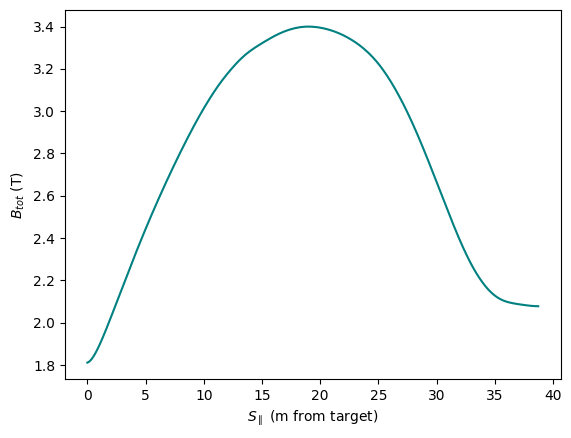

In [2]:
from fusiondls.Profile import Profile

eqb = file_read("eqb_store.pkl")
outer = eqb["V10"]["ou"]  # Outer upper

base = Profile(
    outer["R"],
    outer["Z"],
    outer["Xpoint"],
    outer["Btot"],
    outer["Bpol"],
    outer["S"],
    outer["Spol"],
    name="base",
)

base.plot()
print(f"Connection length: {base.get_connection_length():.2f}m")
print(f"Total flux expansion: {base.get_total_flux_expansion():.2f}")

## Scale profile properties
- Profile has methods to easily scale flux expansion and connection length by either a constant factor, or to a specific value.
- The resulting profile can be used as normal apart from that its R and Z coordinates are no longer valid.

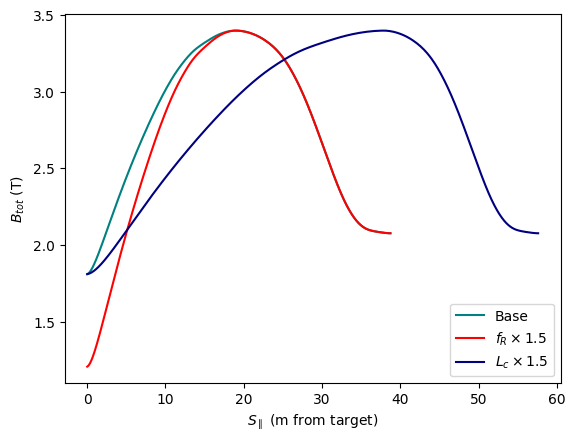

In [13]:
scale_flux_exp = base.copy()
scale_flux_exp.scale_BxBt(scale_factor = 1.5)

scale_conn_length = base.copy()
scale_conn_length.scale_Lc(scale_factor = 1.5)

fig, ax =plt.subplots()
base.plot(ax=ax, mode = "Btot", color = "teal", label = "Base")
scale_flux_exp.plot(ax = ax, mode = "Btot", color = "red", label = r"$f_R \times 1.5$", legend = False)
scale_conn_length.plot(ax = ax, mode = "Btot", color = "navy", label = r"$L_c \times 1.5$", legend = False)

ax.legend()

# Advanced profile modification


## Offsets
- Profiles can be modified by changing the R,Z coordinates of the divertor leg.
- This can be achieved by either offsetting them vertically/horizontally, or specifying coordinates.

Profile modified. Now recalculate topology!
Topology recalculated.
Profile modified. Now recalculate topology!
Topology recalculated.


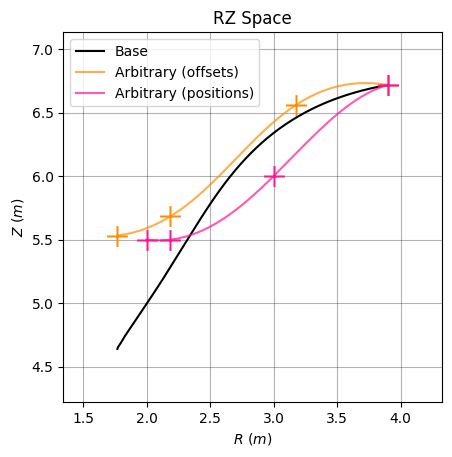

In [39]:
offsets1 = [
    {"pos" : 1,     "offsetx": 0, "offsety": 0.9},
    {"pos" : 0.75,  "offsetx": 0, "offsety": 0.4},
    {"pos" : 0.25,  "offsetx": 0, "offsety": 0.1},
    {"pos" : 0,     "offsetx": 0, "offsety": 0.0},
    ]

arbitrary_offset = base.copy()
arbitrary_offset.offset_control_points(offsets1)
arbitrary_offset.recalculate_topology()
arbitrary_offset.name = "Arbitrary (offsets)"

offsets2 = [
    {"pos" : 1,     "xpos":2.0, "ypos": 5.5},
    {"pos" : 0.75,  "ypos": 5.5},
    {"pos" : 0.25,  "xpos": 3.0, "ypos" : 6.0},
    {"pos" : 0,     "offsetx": 0, "offsety": 0.0},
    ]

arbitrary_pos = base.copy()
arbitrary_pos.offset_control_points(offsets2)
arbitrary_pos.recalculate_topology()
arbitrary_pos.name = "Arbitrary (positions)"

fig, ax = plt.subplots()
base.plot(mode = "RZ",ax = ax, color = "black", label = "Base")
arbitrary_offset.plot_control_points(ax = ax, color = "darkorange")
arbitrary_pos.plot_control_points(ax = ax, color = "deeppink")

ax.legend()


## Interpolating profiles
- Intermediate profiles can be generated by specifying a morph factor.

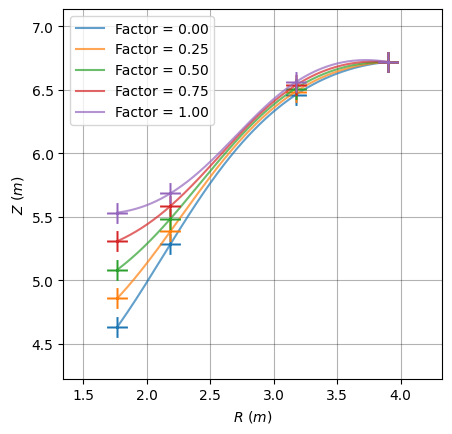

In [46]:
offsets1 = [
    {"pos": 1, "offsetx": 0, "offsety": 0.9},
    {"pos": 0.75, "offsetx": 0, "offsety": 0.4},
    {"pos": 0.25, "offsetx": 0, "offsety": 0.1},
    {"pos": 0, "offsetx": 0, "offsety": 0.0},
]

profiles = []
for factor in [0, 0.25, 0.5, 0.75, 1.0]:
    new_profile = base.copy()
    new_profile.offset_control_points(offsets1, factor=factor, verbose=False)
    new_profile.recalculate_topology(verbose=False)
    new_profile.name = f"Factor = {factor:.2f}"
    profiles.append(new_profile)

fig, ax = plt.subplots()
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i, profile in enumerate(profiles):
    profile.plot_control_points(ax=ax, color=colors[i])

ax.legend()


## Changing magnetic pitch angle assumption
- The relationship between parallel and poloidal connection length can be changed by altering the magnetic pitch angle.
- A shallower angle reduces poloidal front movement for the same parallel distance. 
- Reduction in pitch angle is achieved by increasing Bpol, or "poloidal flux expansion".
- By default, profile manipulation preserves magnetic pitch. This can be disabled so that the Bpol profile is preserved instead. 

Profile modified. Now recalculate topology!
Topology recalculated.
Profile modified. Now recalculate topology!
Topology recalculated.


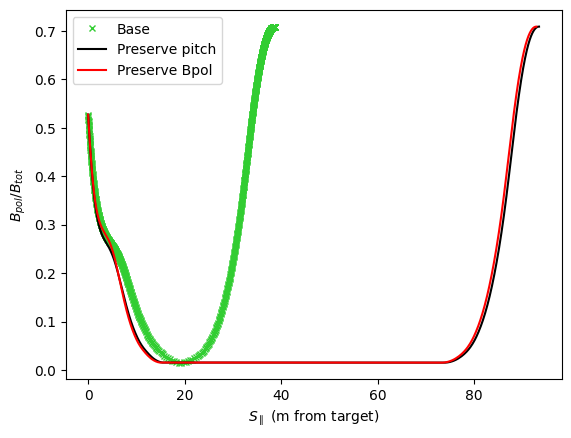

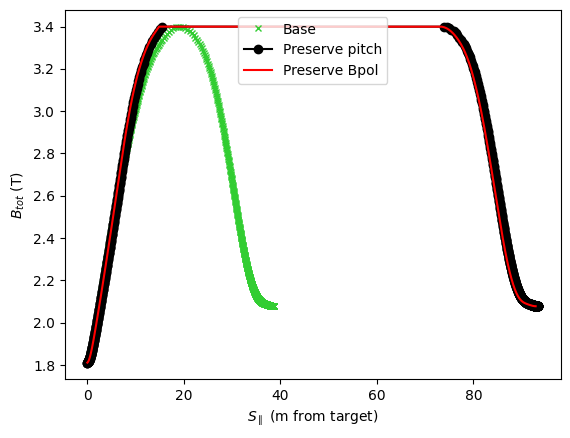

In [ ]:
offsets1 = [
    {"pos": 1, "offsetx": 0, "offsety": 0.9},
    {"pos": 0.75, "offsetx": 0, "offsety": 0.4},
    {"pos": 0.25, "offsetx": 0, "offsety": 0.1},
    {"pos": 0, "offsetx": 0, "offsety": 0.0},
]

preserve_pitch = base.copy()
preserve_pitch.offset_control_points(offsets1)
preserve_pitch.recalculate_topology()
preserve_pitch.name = "Preserve pitch angle"

preserve_Bpol = base.copy()
preserve_Bpol.offset_control_points(offsets1)
preserve_Bpol.recalculate_topology(constant_pitch=False)
preserve_Bpol.name = "Preserve Bpol"


fig, ax = plt.subplots()
base.plot(
    mode="magnetic_pitch",
    ax=ax,
    color="limegreen",
    label="Base",
    lw=0,
    ms=5,
    marker="x",
)
preserve_pitch.plot(mode="magnetic_pitch", ax=ax, color="black", label="Preserve pitch")
preserve_Bpol.plot(mode="magnetic_pitch", ax=ax, color="red", label="Preserve Bpol")
ax.legend()

fig, ax = plt.subplots()
base.plot(mode="Btot", ax=ax, color="limegreen", label="Base", lw=0, ms=5, marker="x")
preserve_pitch.plot(
    mode="Btot", ax=ax, color="black", label="Preserve pitch", marker="o"
)
preserve_Bpol.plot(mode="Btot", ax=ax, color="red", label="Preserve Bpol")
ax.legend()
# ax.set_xlim(-2,20)
